In [1]:
%matplotlib inline
import numpy as np
from scipy import stats, special
import matplotlib.pyplot as plt
import arviz as az

from ipywidgets import interact
import ipywidgets as ipyw

In [2]:
plt.style.use('arviz-darkgrid')  # aplica estilo a los gr√°ficos
np.random.seed(42)  # semilla para fijar n√∫meros aleatorios

# Estad√≠stica, ciencia de datos y an√°lisis de datos

El objetivo de este primer cap√≠tulo es introducir algunos t√©rminos y conceptos generales de estad√≠stica, que nos ser√°n de utilidad para discutir todos los t√≥picos centrales de este curso. La introducci√≥n es bastante general, por lo que a lo largo del texto se proveen de enlaces para seguir leyendo y profundizando en el tema.

## Estad√≠stica y ciencia de datos ¬øDos nombres para lo mismo?

La [estad√≠stica](https://es.wikipedia.org/wiki/Estad%C3%ADstica) es el estudio de la recolecci√≥n, an√°lisis, interpretaci√≥n y organizaci√≥n de datos. El corolario de esta definici√≥n podr√≠a ser que adem√°s de ser una disciplina cient√≠fica en si misma, la estad√≠stica es una disciplina auxiliar de todas las dem√°s ciencias.

La estad√≠stica suele tener el mote de ser una disciplina obscura en el mejor de los casos y de una forma sofisticada de mentir en el peor de ellos. Sin embargo, en los √∫ltimos a√±os ha comenzado a emerger una disciplina llamada ciencia de datos (_data science_ en ingl√©s), para muchos no es m√°s que un nuevo y [sexy](https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century/) nombre para llamar a la vieja estad√≠stica, algo as√≠ como una campa√±a medi√°tica de mejoramiento de imagen. Para otros la ciencia de datos es un aporte valioso que si bien no es exactamente estad√≠stica, est√° contribuyendo a √©sta con nuevos m√©todos, aproximaciones, preguntas, recursos ($$) y por supuesto mucha gente interesada en estos temas.

Una posible definici√≥n de la ciencia de datos y su relaci√≥n con la estad√≠stica se muestra en el siguiente diagrama de Venn. 

<a href="http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram">
<img src='img/DS.png' width=300 >
</a>

Seg√∫n el diagrama, la estad√≠stica es una de las partes de la ciencia de datos. La gran diferencia entre la investigaci√≥n tradicional y la ciencia de datos radica no en los conocimientos estad√≠sticos (que ambas requieren) si no en las habilidades de _hacking_. En esto contexto _hacking_ no hace referencia a la capacidad de vulnerar la seguridad de computadoras ajenas, si no a _la capacidad t√©cnica y creativa para encontrar soluciones mediante el uso de c√≥digo_. 

Entonces, para empezar a hacer ciencia de datos necesitamos:

1. Un problema o pregunta en particular
2. Nociones b√°sicas de programaci√≥n.
3. Nociones b√°sicas de estad√≠stica.

Respecto del primer punto. tanto la investigaci√≥n tradicional como la ciencia de datos necesitan ir acompa√±adas de _conocimiento sustantivo_ (tambi√©n llamado conocimiento de dominio), esto hace referencia al conocimiento de una √°rea particular del saber. La estad√≠stica puede ser de ayuda para estudiar genomas o part√≠culas elementales, pero para poder hacer preguntas relevantes (y entender las respuestas) primero hay que comprender qu√© son los genomas y qu√© son las part√≠culas elementales. Es por ello que la estad√≠stica NO es una m√°quina auto-m√°gica por donde entran datos en crudo por un lado y sale informaci√≥n por el otro (aunque a veces se publicite de esa forma). La estad√≠stica es una herramienta que nos ayuda a pensar y tomar decisiones de forma adecuada, lo cual requiere del conocimiento, el criterio y la responsabilidad de quien la usa.

Respecto del segundo punto. Este curso parte de asumir que ustedes saben lo b√°sico de programaci√≥n en Python, si son principiantes puede que aprendan alguna que otra cosa interesante o quiz√° el curso les ayude a cementar sus conocimientos, pero vamos a considerar que primer punto est√° m√°s o menos cubierto.

El tercer punto es el centro de este curso. El enfoque que tomaremos difiere del t√≠pico curso de estad√≠stica, las diferencias ir√°n surgiendo a medida que se desarrolle el curso. Pero dejenme adelantar una de ellas, usaremos mucho m√°s c√≥digo (en Python), que desarrollos matem√°ticos. Esta decisi√≥n tiene dos razones. Consideramos que el usar c√≥digo permite que una mayor cantidad de personas logre una mejor comprensi√≥n de los conceptos explicados y consideramos que quienes tienen inter√©s en este curso son personas que desean, principalmente, resolver problemas aplicados y no desarrollar un entendimiento "acad√©mico" de la estad√≠stica. Con esta aproximaci√≥n no queremos negar los beneficios de la matem√°tica, de hecho a lo largo del texto encontrar√°n link a material para expandir los conceptos aqu√≠ presentados que requieren un nivel de matem√°tica m√°s avanzado que el asumido para este curso.

## Azahar, azar y dados 

Las palabras azahar y azar no son similares por casualidad ambas provienen de la misma palabra √°rabe que significa flor. Desde la antig√ºedad, y hasta el d√≠a de hoy, ciertos juegos utilizan un hueso con dos lados planos a modo de dado. De hecho se podr√≠a decir que la taba es el antecesor del dado moderno. Para facilitar distinguir un lado del otro, al menos uno de los lados est√° marcado de alguna forma. Resulta ser que los √°rabes usaban una flor. Con el tiempo el castellano adopt√≥ azahar, para designar solo ciertas flores como las del [naranjo](https://www.youtube.com/watch?v=JNKnWEHdcH0) y azar como sin√≥nimo de aleatorio. 

Empecemos, entonces imaginando que tenemos un dado de 6 caras, cada vez que arrojamos el dado solo es posible obtener un n√∫mero entero del 1-6 es decir `[1, 2, 3, 4, 5, 6]`. Al arrojar el dado podemos obtener cualquier de estos n√∫meros sin preferencia de uno sobre otro. Usando Python podemos programar un dado como este de la siguiente forma:

In [3]:
def dado():
    resultados_posibles = [1, 2, 3, 4, 5, 6]
    return np.random.choice(resultados_posibles)

dado()

4

Supongamos que sospechamos que el dados est√° trucado. ¬øQu√© podr√≠amos hacer para evaluar esta posibilidad? 

* Una posibilidad es consultar a los astros o los √°ngeles.
* Otra ser√≠a pensar mucho, mucho, pero mucho sobre el problema y quiz√° declararse agn√≥stico sobre la _truquez_ no solo del dado en cuesti√≥n si no de los dados en general.
* Una tercera alternativa es recolectar datos y analizarlos, esta √∫ltima es la opci√≥n preferida por quienes practican la estad√≠stica.

Usando Python podemos _simular_ la recolecci√≥n de datos de la siguiente forma.

In [4]:
def experimento(N=10):
    muestra = [dado() for i in range(N)]

    for i in range(1, 7):
        print(f'{i}: {muestra.count(i)/N:.2g}')
        
experimento()

1: 0
2: 0.1
3: 0.4
4: 0.1
5: 0.4
6: 0


Los n√∫meros en la primer columna son los posibles resultados. Los de la segunda columna corresponden con la frecuencia con la que aparece cada n√∫mero. La frecuencia es la cantidad de veces que aparece cada uno de los posibles resultados dividido por `N`. Siendo `N` el total de veces que arrojamos el dado.

Hay al menos dos cosas de las cuales tomar nota en este ejemplo:

* Si ejecutan la celda anterior ver√°n que cada vez que la ejecutan obtienen un resultado distinto. Esta es precisamente la raz√≥n de usar dados en juegos _de azar_, cada vez que lo arrojamos obtenemos un n√∫mero que no podemos predecir.

* Si arrojamos muchas veces un mismo dado la capacidad de predecir cada una de las tiradas no mejora. En ese sentido recolectar datos no nos ayuda. Pero recolectar datos si mejora la capacidad de predecir el _listado de las frecuencias_, de hecho la capacidad mejora al aumentar el valor de `N`. Para un valor de `N=10000` ver√°s que las frecuencias obtenidas son aproximadamente $0.17$ y resulta ser que $0.17 \approx \frac{1}{6}$ que es lo que esperar√≠amos si cada n√∫mero en el dado tuviera la misma posibilidad.

Estas dos observaciones no est√°n restringidas a los dados y los juegos de azar. Si nos pes√°ramos todos los d√≠as obtendr√≠amos distintos valores ya que el peso tiene relaci√≥n con la cantidad de comida que ingerimos, el agua que tomamos, cuantas veces fuimos al ba√±o, la precisi√≥n de la balance, la ropa que usamos (en caso de pesarnos vestidos). Por todo ello una sola medida podr√≠a no ser representativa de nuestro peso. Por supuesto podr√≠a ser que las variaciones fuesen peque√±as y no las consideramos importantes, pero eso es adelantarse a nuestra discusi√≥n. El punto que importa en este momento es que los datos van acompa√±ados de incertidumbre, gran parte de la estad√≠stica tiene que ver con como lidiar con esa incertidumbre.

## Probabilidades


Resulta ser que es posible utilizar probabilidades para asignar n√∫meros precisos a la incertidumbre de lo que observamos, medimos, modelamos, etc. Por ello Joseph K. Blitzstein dice _La matem√°tica es la l√≥gica de la certeza mientras que la probabilidad es la l√≥gica de la incerteza_.

Entender como pensar en presencia de incerteza es central en Ciencia de Datos y practicamente en cualquier disciplina cient√≠fica. Esta incerteza proviene de diversas fuentes, incluyendo datos incompletos, errores de medici√≥n, l√≠mites de los dise√±os experimentales, dificultad de observar ciertos eventos, aproximaciones, etc.

A continuaci√≥n veremos una breve introducci√≥n a conceptos centrales en probabilidad a partir de lo cuales podremos comprender mejor los fundamentos del modelado Bayesiano. Para quienes tengan inter√©s en profundizar en el tema recomiendo leer el libro [Introduction to Probability](https://www.crcpress.com/Introduction-to-Probability/Blitzstein-Hwang/p/book/9781466575578) de Joseph K. Blitzstein y Jessica Hwang.

El marco matem√°tico para trabajar con las probabilidades se construye alrededor de los conjuntos matem√°ticos. 

El espacio muestral $\mathcal{X}$ es el conjunto de todos los posibles resultados de un experimento. Un evento $A$ es un subconjunto de $\mathcal{X}$. Decimos que $A$ ha ocurrido si al realizar un _experimento_ obtenemos como resultado $A$. Si tuvi√©ramos un t√≠pico dado de 6 caras tendr√≠amos que:

$$\mathcal{X} = \{1, 2, 3, 4, 5, 6\} \tag {0.0}$$

Podemos definir al evento $A$ como:

$$A = \{2\} \tag {0.1}$$

Si queremos indicar la probabilidad del evento $A$ escribimos $P(A=2)$ o de forma abreviada $P(A)$. 

$P(A)$ puede tomar cualquier valor en el intervalo comprendido entre 0 y 1 (incluidos ambos extremos), en [notaci√≥n de intervalos](https://es.wikipedia.org/wiki/Intervalo_(matem%C3%A1tica)#Notaci%C3%B3n) esto se escribe como [0, 1]. Es importante notar que no es necesariamente cierto que $P(A) = \frac{1}{6}$.

Al definir el evento $A$ podemos usar m√°s de un elemento de $\mathcal{X}$. Algunos ejemplos ser√≠an obtener un n√∫mero impar (siempre dentro de $\mathcal{X}$) $A = \{1, 3, 5\}$, o n√∫meros mayores o iguales a 4 $A = \{4,5,6\}$, o $A = \{1,2,4,6\}$. Para cualquier problema concreto la definici√≥n de un evento como $A$ depender√° directamente del problema.

Resumiendo, los eventos son subconjuntos de un espacio muestral definido adecuadamente y las probabilidades son n√∫meros entre 0 y 1 asociados a la posibilidad que esos eventos ocurran. Si el evento es imposible entonces la probabilidad de ese evento ser√° exactamente 0, si en cambio el evento sucede siempre entonces la probabilidad de ese evento ser√° de 1. Todos los valores intermedios reflejan grados de incerteza. Desde este punto de vista es _natural_ preguntarse cual es la probabilidad que la masa de Saturno sea $x$ kg, o hablar sobre la probabilidad de lluvia durante el 25 de Mayo de 1810, o la probabilidad de que ma√±ana amanezca. Esta interpretaci√≥n del concepto de probabilidad se suele Bayesiana o subjetiva.

## Probabilidad condicional

Una probabilidad condicional es simplemente la probabilidad de un evento dado que conocemos que otro evento ha sucedido. Al preguntar cual es la probabilidad que llueva dado que est√° nublado estamos planteando una probabilidad condicional.

Dado dos eventos $A$ y $B$ siendo $P(B) > 0$, la probabilidad de $A$ dado $B$ es definida como:

$$
P(A \mid B) \triangleq \frac{P(A, B)}{P(B)} \tag{0.5}
$$


$P(A, B)$ es la _probabilidad conjunta_ es decir la probabiliad que suceda el evento $A$ y que ocurra el evento $B$, tambi√©n se suele escribir como $P(A \cap B)$, el s√≠mbolo $\cap$ indica intersecci√≥n de conjuntos.

$P(A \mid B)$ es lo que se conoce como probabilidad condicional, y es la probabilidad de que ocurra el evento A condicionada por el hecho que sabemos que B ha ocurrido. Por ejemplo la probabilidad que una vereda est√© mojada es diferente de la probabilidad que tal vereda est√© mojada dado que est√° lloviendo. 

Una probabilidad condicional se puede visualizar como la reducci√≥n del espacio muestral. Para ver esto de forma m√°s clara vamos a usar una figura adaptada del libro [Introduction to Probability](https://www.crcpress.com/Introduction-to-Probability/Blitzstein-Hwang/p/book/9781466575578) de Joseph K. Blitzstein & Jessica Hwang. En ella se puede ver como pasamos de tener los eventos $A$ y $B$ en el espacio muestral $\mathcal{X}$, en el primer cuadro, a tener $P(A \mid B)$ en el √∫ltimo cuadro donde el espacio muestral se redujo de $\mathcal{X}$ a $B$. 


<img src='img/cond.png' width=500 >


El concepto de probabilidad condicional est√° en el coraz√≥n de la estad√≠stica y es central para pensar en como debemos actualizar el conocimiento que tenemos de un evento a la luz de nuevos datos.  veremos m√°s sobre esto en el curso "An√°lisis Bayesiano de datos" y en "Aprendizaje autom√°tico y miner√≠a de datos". Por ahora dejamos este tema con la siguiente aclaraci√≥n. Todas las probabilidades son condicionales (respecto de alg√∫n supuesto o modelo) a√∫n cuando no lo expresemos expl√≠citamente, no existen probabilidades sin contexto.

## Distribuciones de probabilidad

A nosotros en general no nos interesar√° calcular la probabilidad de eventos concretos sino que nos interesar√° calcular distribuciones de probabilidad. Es decir, en vez de calcular la probabilidad de obtener el n√∫mero 5 al arrojar un dado, nos interesar√° averiguar el _listado de las frecuencias_ de todas las posibilidades del dado (1 al 6). Una vez obtenido este listado podremos hacer preguntas como ¬øCu√°l es la probabilidad de obtener el n√∫mero 5? u otras preguntas relacionadas. El nombre formal de este _listado_ es **distribuci√≥n de probabilidad**.

En el ejemplo del dado obtuvimos una distribuci√≥n de probabilidad emp√≠rica, es decir una distribuci√≥n calculada a partir de datos. Pero tambi√©n existen distribuciones te√≥ricas, las cuales son centrales en estad√≠stica entre otras razones por que permiten construir modelos probabil√≠sticos.

Las distribuciones de probabilidad te√≥ricas tienen formulas matem√°ticas precisas, de forma similar a como las circunferencias tienen una definici√≥n matem√°tica precisa.

> Una circunferencia es el lugar geom√©trico de los puntos de un plano que equidistan a otro punto llamado centro.

Dado el par√°metro `radio` una circunferencia queda perfectamente definida. Si necesit√°ramos ubicar la circunferencia respecto de otros objetos en el plano, necesitar√≠amos adem√°s las coordenadas del centro, pero omitamos ese _detalle_ por el momento.

Veamos el siguiente ejemplo:

In [5]:
def dibuja_circ(radio):
    _, ax = plt.subplots(figsize=(6, 6))
    x = np.linspace(0, 2*np.pi, 100)
    ax.plot(radio*np.cos(x), radio*np.sin(x))
    ax.set_xlim(-11, 11)
    ax.set_ylim(-11, 11)
    ax.set_xticks([])
    ax.set_yticks([])


interact(dibuja_circ,
         radio=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=2.));

interactive(children=(FloatSlider(value=2.0, description='radio', max=10.0, min=0.5, step=0.5), Output()), _do‚Ä¶

Podr√≠amos decir que no existe una sola circunferencia, sino una familia de circunferencias donde cada miembro se diferencia del resto solo por el valor del par√°metro `radio`, ya que una vez definido este par√°metro la circunferencia queda definida.

De forma similar las distribuciones de probabilidad vienen en familias cuyos miembros quedan definidos por uno o m√°s par√°metros. Es com√∫n que los nombres de los par√°metros de las distribuciones de probabilidad sean letras del alfabeto griego, aunque esto no es siempre as√≠.

En el siguiente ejemplo tenemos una distribuci√≥n de probabilidad que podr√≠amos usar para representar un dado y que es controlada por dos par√°metros $\alpha$ y $\beta$:

In [6]:
def dist_dado(Œ±, Œ≤):
    n = 5
    x = np.arange(0, 6)
    dist_pmf = special.binom(n, x) * (special.beta(x+Œ±, n-x+Œ≤) / special.beta(Œ±, Œ≤))
    plt.vlines(x, 0, dist_pmf, colors='C0', lw=4);
    plt.ylim(0, 1)
    plt.xticks(x, x+1)


interact(dist_dado,
         Œ±=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=1),
         Œ≤=ipyw.FloatSlider(min=0.5, max=10, step=0.5, value=1));       
         

interactive(children=(FloatSlider(value=1.0, description='Œ±', max=10.0, min=0.5, step=0.5), FloatSlider(value=‚Ä¶

Es distribuci√≥n (o familia de distribuciones) se llama `beta-binomial`, si cambiamos los par√°metros los par√°metros $\alpha$ y $\beta$ la "forma particular" de la distribuci√≥n cambiar√°, podemos hacer que sea _plana_ o concentrada m√°s hacia el medio o hacia uno u otro extremo, etc. As√≠ como el radio de la circunferencia debe ser positivo, los par√°metros $\alpha$ y $\beta$ tambi√©n est√°n restringidos a ser positivos.

### Variables aleatorias discretas y distribuciones de probabilidad

Una variable aleatoria es una funci√≥n que asocia n√∫meros reales $\mathbb{R}$ con un espacio muestral. Siguiendo con un dado si los eventos de inter√©s fuesen los n√∫meros del dado entonces el mapeo es simple, ya que asociamos ‚öÄ con el n√∫mero 1, ‚öÅ con el 2, etc. Si tuvi√©ramos dos dados podr√≠amos definir una variable aleatoria $S$ como la suma de ambos dados. En este caso la variable aleatoria tomar√≠a los valores $\{2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12$\}$ y si los dados no est√°n trucados la distribuci√≥n de probabilidad de la variable ser√≠a

<a href="https://en.wikipedia.org/wiki/File:Dice_Distribution_(bar).svg"><img src='img/dist_dos_dados.png' width=500 ></a>


Otra variable aleatoria podr√≠a ser $C$ cuyo espacio muestral es $\{rojo, verde, azul\}$. Si los eventos de inter√©s fuesen `rojo, verde, azul,` entonces podr√≠amos _codificarlos_ de la siguiente forma:

`C(rojo) = 0, C(verde)=1, C(azul)=2`

Esta _codificaci√≥n_ es √∫til ya que en general es m√°s f√°cil operar con n√∫meros que con _cadenas (strings)_, ya sea que las operaciones las hagamos manualmente o con una computadora.

Una variable es aleatoria en el sentido de que en cada _experimento_ es posible obtener un evento distinto sin que la sucesi√≥n de eventos siga un patr√≥n determinista. Por ejemplo si _preguntamos_ cual es el valor de $C$ tres veces seguida podr√≠amos obtener, `rojo, rojo, azul` o quiz√° `azul, verde, azul`, etc. 


Creo que hay al menos dos grandes fuentes de confusi√≥n cuando se habla de _variables aleatorias_:

* La variable NO puede tomar cualquier valor posible, en el ejemplo de los colores solo son posibles 3 valores. En el ejemplo del dado solo 6 valores son posibles.
* _Aleatorio_ NO implica que todos los eventos tienen igual probabilidad. 

bien podr√≠a darse el siguiente ejemplo:

$$P(C=rojo) = \frac{1}{2}, P(C=verde) = \frac{1}{4}, P(C=azul) = \frac{1}{4}$$

La equiprobabilidad de los eventos es solo un caso especial.

Pr√°cticamente la totalidad de los problemas de inter√©s requiere lidiar con solo dos tipos de variables aleatorias: 

* Discretas
* Continuas 

Una variable aleatoria discreta es una variable que puede tomar valores discretos, los cuales forman un conjunto finito (o infinito [numerable](https://es.wikipedia.org/wiki/Conjunto_numerable)). En nuestro ejemplo $C$ es discreta ya que solo puede tomar 3 valores, sin posibilidad de valores intermedios entre ellos, no es posible obtener el valor _verde-rojizo_! $S$ tambi√©n es discreta y como ya dijimos solo es posible obtener los enteros en el intervalo [2-12].

Si en vez de "r√≥tulos" hubi√©ramos usado el espectro _continuo_ de longitudes onda _visibles_ otro ser√≠a el caso, ya que podr√≠amos haber definido a $C=\{400 \text{ nm} ... 750\text{ nm}\}$  y en este caso no hay dudas que ser√≠a posible obtener un valor _a mitad de camino_ entre _rojo_ ($\approx 700 \text{ nm}$) y _verde_ ($\approx 530 \text{ nm}$), de hecho podemos encontrar infinitos valores entre ellos. Este ser√≠a el ejemplo de una variable aleatoria continua.

Una variable aleatoria tiene una _lista_ asociada con la probabilidad de cada evento. El nombre formal de esta _lista_ es disribuci√≥n de probabilidad, en el caso particular de variables aleatorias discretas se le suele llamar tambi√©n funci√≥n de masa de probabilidad (o **pmf** por su sigla en ingl√©s). Es importante destacar que la $pmf$ es una funci√≥n que devuelve probabilidades, por lo tanto siempre obtendremos valores comprendidos entre [0, 1] y cuya suma total (sobre todos los eventos) dar√° 1.

En principio nada impide que uno defina su propia distribuci√≥n de probabilidad. Pero existen algunas distribuciones de probabilidad tan com√∫nmente usadas que tienen "nombre propio" por lo que conviene saber que existen. El siguiente listado no es exhaustivo ni tiene como prop√≥sito que _memoricen_ las distribuciones y sus propiedades, solo que ganen cierta familiaridad con las mismas. Si en el futuro necesitan utilizar alguna $pmf$ pueden volver a esta _notebook_ (o pueden revisar Wikipedia!!!)

En las siguientes gr√°ficas las _alturas_ de los puntos azules indican la probabilidad de cada valor de $x$. Se indican, adem√°s, la media ($\mu$) y desviaci√≥n est√°ndar ($\sigma$) de las distribuciones, es importante destacar que estos valores NO son calculados a partir de _datos_  si no que son los valores exactos (calculados anal√≠ticamente) que le corresponden a cada distribuci√≥n.

#### Distribuci√≥n uniforme discreta

Es una [distribuci√≥n](https://en.wikipedia.org/wiki/Discrete_uniform_distribution) que asigna igual probabilidad a un conjunto finitos de valores, su $pmf$ es:

$$p(k \mid a, b)={\frac {1}{b - a + 1}} \tag {0.6}$$

Para valores de $k$ en el intervalo [a, b], fuera de este intervalo $p(k) = 0$

Podemos usar esta distribuci√≥n para modelar, por ejemplo un dado no cargado.

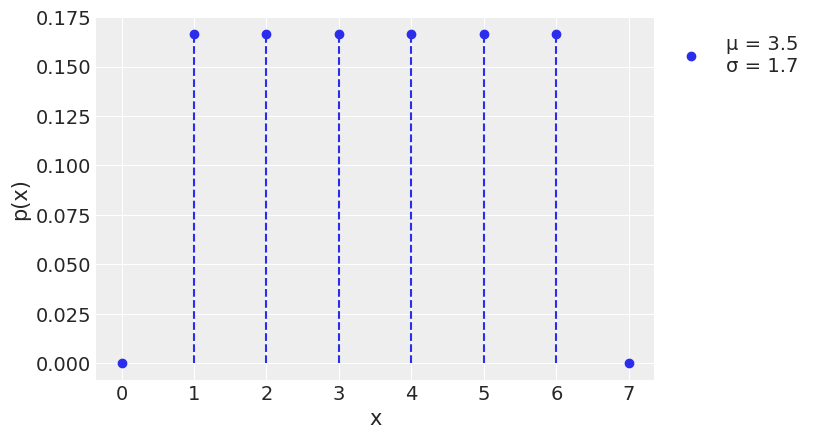

In [7]:
distri = stats.randint(1, 7)  # l√≠mite inferior, l√≠mite superior + 1
x = np.arange(0, 8)
x_pmf = distri.pmf(x)  # la pmf evaluada para todos los "x"
media, varianza = distri.stats(moments='mv')
plt.plot(x, x_pmf, 'C0o',
         label=f'Œº = {media:3.1f}\nœÉ = {varianza**0.5:3.1f}')
plt.vlines(x,  0, x_pmf, colors='C0', linestyles='--')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend(bbox_to_anchor=(1, 1));

En la figura anterior la altura de cada punto indica la probabilidad de cada evento, usamos puntos y lineas punteadas para remarcar que la distribuci√≥n es discreta. En este ejemplo en concreto la distribuci√≥n uniforme est√° definida en el intervalo [1, 6]. Por lo tanto todos los valores menores a 1 y mayores a 6 tienen probabilidad 0. Al ser una distribuci√≥n uniforme todos los puntos tienen la misma altura y esa altura es $\frac{1}{6}$.

Los **par√°metros** de la distribuci√≥n discreta uniforme son dos:
* El l√≠mite interior representado con la letra "a" en la expresi√≥n 0.6
* El l√≠mite superior representado con la letra "b" en la expresi√≥n 0.6

Si cambiamos los par√°metros la "forma particular" de la distribuci√≥n cambiar√° (prueben por ejemplo reemplazar `stats.randint(1, 7)` en el bloque de c√≥digo anterior por stats.randint(1, 4)). Es por ello que se suele hablar de familia de distribuciones, cada miembro de esa familia es una distribuci√≥n con una combinaci√≥n particular y v√°lida de par√°metros. Por ejemplo _la familia de distribuciones discretas uniforme_ es aquella indicada en la expresi√≥n 0.6, siempre y cuando:
* $a < b$
* $a \in \mathbb {Z}$
* $b \in  \mathbb {Z}$

donde $\mathbb {Z}$ es el conjunto de los n√∫meros enteros.


Es com√∫n vincular los par√°metros con cantidades que tienen sentido _f√≠sico_ por ejemplo en un dado de 6 caras tiene sentido que $a=1$ y $b=6$. A veces desconocemos los valores de los par√°metros y es nuestro trabajo utilizar datos y m√©todos estad√≠sticos para encontrar esos valores.

#### Distribuci√≥n binomial

Es la [distribuci√≥n](https://en.wikipedia.org/wiki/Binomial_distribution) de probabilidad discreta que cuenta el n√∫mero de √©xitos en una secuencia de $n$ ensayos de Bernoulli (experimentos si/no) independientes entre s√≠, con una probabilidad fija $p$ de ocurrencia del √©xito entre los ensayos.
Cuando $n=1$ esta distribuci√≥n se reduce a la distribuci√≥n de Bernoulli.

$$p(x \mid n,p) = \frac{n!}{x!(n-x)!}p^x(1-p)^{n-x} \tag {0.7}$$$

El t√©rmino $p^x(1-p)^{n-x}$ indica la probabilidad de obtener $x$ √©xitos en $n$ intentos. Este t√©rmino solo tiene en cuenta el n√∫mero total de √©xitos obtenidos pero no la secuencia en la que aparecieron. El primer t√©rmino conocido como **coeficiente binomial** calcula todas las posibles combinaciones de $n$ en $x$, es decir el n√∫mero de subconjuntos de $x$ elementos escogidos de un conjunto con $n$ elementos.

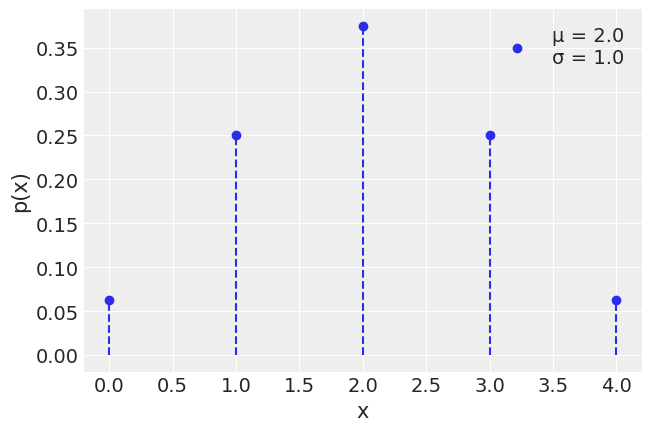

In [8]:
n = 4  # n√∫mero de intentos
p = 0.5  # probabilidad de "√©xitos"
distri = stats.binom(n, p)  
x = np.arange(0, n + 1)
x_pmf = distri.pmf(x)  # la pmf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot(x, x_pmf, 'C0o',
         label=f'Œº = {media:3.1f}\nœÉ = {varianza**0.5:3.1f}')
plt.vlines(x,  0, x_pmf, colors='C0', linestyles='--')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

#### Distribuci√≥n de Poisson

Es una [distribuci√≥n](https://en.wikipedia.org/wiki/Poisson_distribution) de probabilidad discreta que expresa la probabilidad que $x$ eventos sucedan en un intervalo fijo de tiempo (o espacio o volumen) cuando estos eventos suceden con una taza promedio $\mu$ y de forma independiente entre si. Se la utiliza para modelar eventos con probabilidades peque√±as (sucesos _raros_) como accidentes de tr√°fico o decaimiento radiactivo.

$$
p(x \mid \mu) = \frac{\mu^{x} e^{-\mu}}{x!} \tag {0.8}$
$$

Tanto la media como la varianza de esta distribuci√≥n est√°n dadas por $\mu$. 

A medida que $\mu$ aumenta la distribuci√≥n de Poisson se aproxima a una distribuci√≥n Gaussiana (aunque sigue siendo discreta). La distribuci√≥n de Poisson tiene estrecha relaci√≥n con otra distribuci√≥n de probabilidad, la binomial. Una distribuci√≥n binomial puede ser aproximada con una distribuci√≥n de Poisson, cuando $n >> p$, es decir, cuando la cantidad de "√©xitos" ($p$) es baja respecto de la cantidad de "intentos" (p) entonces $Poisson(np) \approx Binon(n, p)$.  Por esta raz√≥n la distribuci√≥n de Poisson tambi√©n se conoce como "ley de los peque√±os n√∫meros" o "ley de los eventos raros". Ojo que esto no implica que $\mu$ deba ser peque√±a, quien es peque√±o/raro es $p$ respecto de $n$.

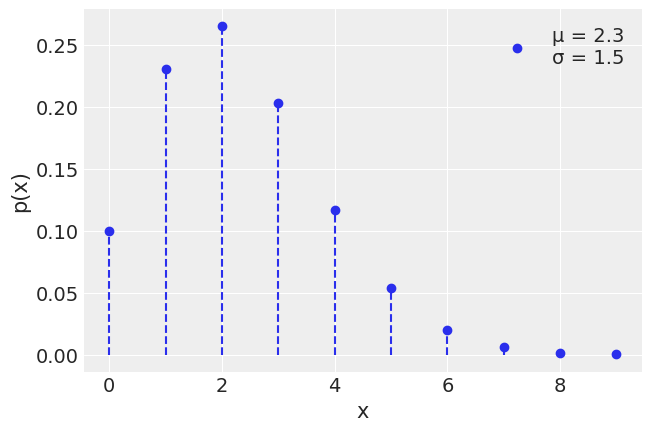

In [9]:
distri = stats.poisson(2.3)  # occurrencia media del evento
x = np.arange(0, 10)
x_pmf = distri.pmf(x)  # la pmf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot(x, x_pmf, 'C0o',
         label=f'Œº = {media:3.1f}\nœÉ = {varianza**0.5:3.1f}')
plt.vlines(x,  0, x_pmf, colors='C0', linestyles='--')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

### Variables aleatorias y distribuciones de probabilidad continuas

Hasta ahora hemos visto variables aleatorias discretas y distribuciones de masa de probabilidad. Existe otro tipo de variable aleatoria que es muy usado y son las llamadas variables aleatorias continuas, ya que toman valores en $\mathbb{R}$.

La diferencia m√°s importante entre variables aleatoria discretas y continuas es que para las continuas $P(X=x) = 0$, es decir, la probabilidad de cualquier valor es exactamente 0.

En las gr√°ficas anteriores, para variables discretas, es la altura de las lineas lo que define la probabilidad de cada evento. Si sumamos las alturas siempre obtenemos 1, es decir la suma total de las probabilidades. En una distribuci√≥n continua no tenemos _lineas_ si no que tenemos una curva continua, la altura de esa curva es la _densidad de probabilidad_. Si queremos averiguar cuanto m√°s probable es el valor $x_1$ respecto de $x_2$ basta calcular:

$$\frac{pdf(x_1)}{pdf(x_2)} \tag {0.9}$$$

Donde $pdf$ es la funci√≥n de densidad de probabilidad (por su sigla en ingl√©s). Y es an√°loga a la $pmf$ que vimos para variables discretas. Una diferencia importante es que la $pdf(x)$ puede ser mayor a 1. Para obtener una probabilidad a partir de una pdf debemos integrar en un intervalo dado, ya que es el √°rea bajo la curva y no la altura lo que nos da la probabilidad, es decir es esta integral la que debe dar 1.

$$P(a \lt X \lt b) =  \int_a^b pdf(x) dx$$

En muchos textos es com√∫n usar $p$ para referirse a la probabilidad de un evento en particular o a la $pmf$ o a la $pdf$, esperando que la diferencia se entienda por contexto.

A continuaci√≥n veremos varias distribuciones continuas.

#### Distribuci√≥n uniforme

A√∫n siendo simple, la distribuci√≥n [uniforme](https://en.wikipedia.org/wiki/Uniform_distribution_%28continuous%29) es muy usada en estad√≠stica, por ejemplo para representar nuestra ignorancia sobre el valor que pueda tomar un par√°metro.

$$
p(x \mid a,b)=\begin{cases} \frac{1}{b-a} & para\ a \le x \le b \\ 0 &  \text{para el resto} \end{cases} \tag {0.10}$
$$

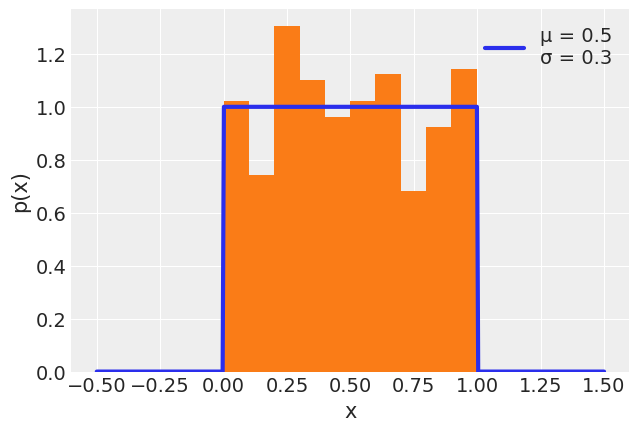

In [10]:
distri = stats.uniform(0, 1)  # distribuci√≥n uniforme entre a=0 y b=1
x = np.linspace(-0.5, 1.5, 400)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribuci√≥n
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=3,
          label=f'Œº = {media:3.1f}\nœÉ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

En la figura anterior la curva azul representa la $pdf$. La $pdf$ es un objeto matem√°tico que da la descripci√≥n exacta de la distribuci√≥n, no es algo que exista en la _realidad_ si no una construcci√≥n matem√°tica que es √∫til para aproximar o modelar alg√∫n aspecto de la _realidad_. La $pdf$ es como las esferas, las esferas no existen pero pueden ser √∫tiles para describir objetos tales como pelotas, planetas, √°tomos, a√∫n cuando ni las pelotas, planetas o √°tomos sean esferas.

El histograma en naranja representa una muestra tomadas a partir de la $pdf$ representada en azul. A diferencia de la curva azul, que es un objeto (matem√°tico) concreto. Una muestra es aleatoria. Cada vez que ejecutemos la celda anterior la curva azul ser√° la misma pero el histograma cambiar√°.

Una aclaraci√≥n antes de continuar. Los histogramas no son lo mismo que los gr√°ficos de barras. Los histogramas son una forma de representaci√≥n visual de datos que usa barras a fin de aproximar una distribuci√≥n continua. Si bien la cantidad de barras es discreta, la distribuci√≥n que intenta aproximar es continua, es por ello que las barras se dibujan de forma contigua, mientras que en los gr√°ficos de barras (que representan distribuciones discretas) las barras se dibujan espaciadas.

Luego de estas aclaraciones continuemos con otras distribuciones de probabilidad continuas.

#### Distribuci√≥n Gaussiana (o normal)

Es quiz√° la [distribuci√≥n](https://en.wikipedia.org/wiki/Normal_distribution) m√°s conocida. Por un lado por que muchos fen√≥menos pueden ser descriptos (aproximadamente) usando esta distribuci√≥n. Por otro lado por que posee ciertas propiedades matem√°ticas que facilitan trabajar con ella de forma anal√≠tica. Es por ello que muchos de los resultados de la estad√≠stica frecuentista se basan en asumir una distribuci√≥n Gaussiana.

La distribuci√≥n Gaussiana queda definida por dos par√°metros, la media $\mu$ y la desviaci√≥n est√°ndar $\sigma$. Una distribuci√≥n Gaussiana con $\mu = 0$ y $\sigma = 1$ es conocida como la _distribuci√≥n Gaussiana est√°ndar_.

$$
p(x \mid \mu,\sigma) = \frac{1}{\sigma \sqrt{ 2 \pi}} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2}} \tag {0.11}
$$

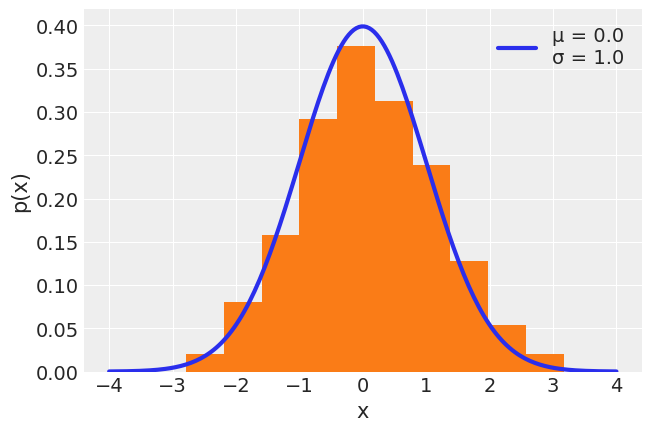

In [11]:
distri = stats.norm(loc=0, scale=1)  # media cero y desviaci√≥n standard 1
x = np.linspace(-4, 4, 200)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribuci√≥n
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=3,
          label=f'Œº = {media:3.1f}\nœÉ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

#### Distribuci√≥n t de Student

Hist√≥ricamente esta [distribuci√≥n](http://es.wikipedia.org/wiki/Distribuci%C3%B3n_t_de_Student) surgi√≥ para estimar la media de una poblaci√≥n normalmente distribuida cuando el tama√±o de la muestra es peque√±o. En estad√≠stica Bayesiana su uso m√°s frecuente es el de generar modelos robustos a datos aberrantes.


$$p(x \mid \nu,\mu,\sigma) = \frac{\Gamma(\frac{\nu + 1}{2})}{\Gamma(\frac{\nu}{2})\sqrt{\pi\nu}\sigma} \left(1+\frac{1}{\nu}\left(\frac{x-\mu}{\sigma}\right)^2\right)^{-\frac{\nu+1}{2}} \tag {0.12}
$$

donde $\Gamma$ es la funci√≥n [gamma](https://en.wikipedia.org/wiki/Gamma_function) y donde $\nu$ es un par√°metro llamado _grados de libertad_ en la mayor√≠a de los textos aunque tambi√©n se le dice _grado de normalidad_, ya que a medida que $\nu$ aumenta la distribuci√≥n se aproxima a una Gaussiana. En el caso extremo de $\lim_{\nu\to\infty}$ la distribuci√≥n es exactamente igual a una Gaussiana.

En el otro _extremo_, cuando $\nu=1$, (aunque en realidad $\nu$ puede tomar valores por debajo de 1) estamos frente a una distribuci√≥n de [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution). Es similar a una Gaussiana pero las colas decrecen muy lentamente, eso provoca que en teor√≠a esta distribuci√≥n no poseen una media o varianza definidas. Es decir, es posible calcular a partir de un conjunto de datos una media, pero si los datos provienen de una distribuci√≥n de Cauchy, la dispersi√≥n alrededor de la media ser√° alta y esta dispersi√≥n no disminuir√° a medida que aumente el tama√±o de la muestra. La raz√≥n de este comportamiento extra√±o es que en distribuciones como la Cauchy est√°n dominadas por lo que sucede en las colas de la distribuci√≥n, contrario a lo que sucede por ejemplo con la distribuci√≥n Gaussiana.

Para esta distribuci√≥n $\sigma$ no es la desviaci√≥n est√°ndar, que como ya se dijo podr√≠a estar indefinida, $\sigma$ es la _escala_. A medida que $\nu$ aumenta la _escala_ converge a la desviaci√≥n est√°ndar de una distribuci√≥n Gaussiana.

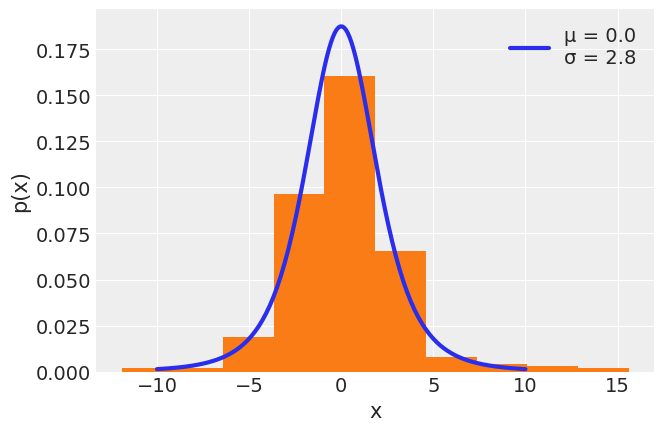

In [12]:
distri = stats.t(loc=0, scale=2, df=4) # media 0, escala 2, grados de libertad 4
x = np.linspace(-10, 10, 200)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribuci√≥n
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=3,
          label=f'Œº = {media:3.1f}\nœÉ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

#### Distribuci√≥n exponencial

La distribuci√≥n [exponencial](https://en.wikipedia.org/wiki/Exponential_distribution) se define solo para $x > 0$. Esta distribuci√≥n se suele usar para describir el tiempo que transcurre entre dos eventos que ocurren de forma continua e independiente a una taza fija. El n√∫mero de tales eventos para un tiempo fijo lo da la distribuci√≥n de Poisson.

$$
p(x \mid \lambda) = \lambda e^{-\lambda x} \tag {0.13}
$$

La media y la desviaci√≥n est√°ndar de esta distribuci√≥n est√°n dadas por $\frac{1}{\lambda}$ 

Scipy usa una parametrizaci√≥n  diferente donde la escala es igual a $\frac{1}{\lambda}$

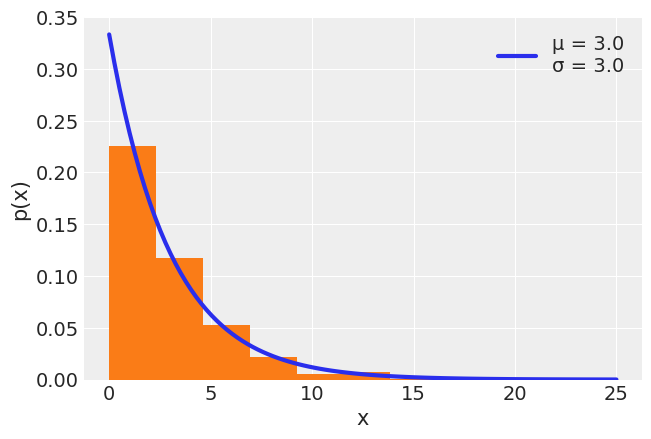

In [13]:
distri = stats.expon(scale=3)  # escala 3, lambda = 1/3
x = np.linspace(0, 25, 100)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribuci√≥n
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=3,
          label=f'Œº = {media:3.1f}\nœÉ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

#### Distribuci√≥n de Laplace

Tambi√©n llamada distribuci√≥n [doble exponencial](https://en.wikipedia.org/wiki/Laplace_distribution), ya que puede pensarse como una distribuci√≥n exponencial "m√°s su imagen especular". Esta distribuci√≥n surge de medir la diferencia entre dos variables exponenciales (id√©nticamente distribuidas). 

$$p(x \mid \mu, b) = \frac{1}{2b} \exp \left\{ - \frac{|x - \mu|}{b} \right\} \tag {0.14}$$


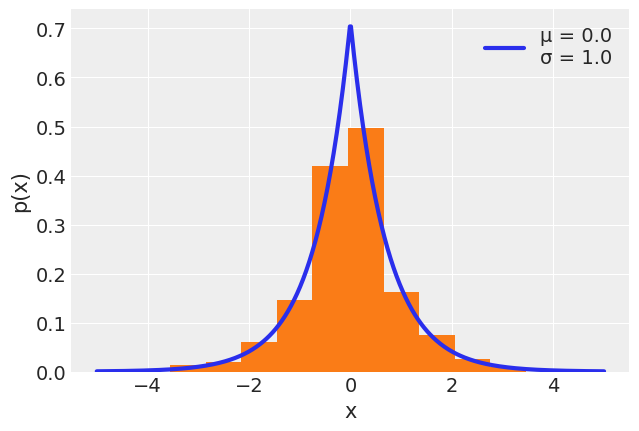

In [14]:
distri = stats.laplace(0, 0.7)  # escala 3, lambda = 1/3
x = np.linspace(-5, 5, 500)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribuci√≥n
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=3,
          label=f'Œº = {media:3.1f}\nœÉ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

#### Distribuci√≥n beta

Es una [distribuci√≥n](https://en.wikipedia.org/wiki/Beta_distribution) definida en el intervalo [0, 1]. Se usa para modelar el comportamiento de variables aleatorias limitadas a un intervalo finito. Es √∫til para modelar proporciones o porcentajes. 

$$
p(x \mid \alpha, \beta)= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, x^{\alpha-1}(1-x)^{\beta-1} \tag {0.15}
$$

El primer t√©rmino es simplemente una constante de normalizaci√≥n que asegura que la integral de la $pdf$ de 1. $\Gamma$ es la funci√≥n [gamma](https://en.wikipedia.org/wiki/Gamma_function). Cuando $\alpha=1$ y $\beta=1$ la distribuci√≥n beta se reduce a la distribuci√≥n uniforme.

Si queremos expresar la distribuci√≥n beta en funci√≥n de la media y la dispersi√≥n alrededor de la media podemos hacerlo de la siguiente forma.

$$\alpha = \mu \kappa$$
$$\beta = (1 ‚àí \mu) \kappa$$

Siendo $\mu$ la media y $\kappa$ una par√°metro llamado concentraci√≥n a media que $\kappa$ aumenta la dispersi√≥n disminuye. N√≥tese, adem√°s que $\kappa = \alpha + \beta$.

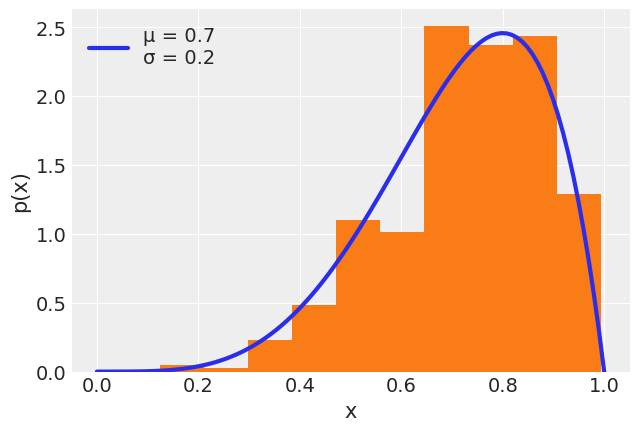

In [15]:
distri = stats.beta(5, 2)  # alfa=5, beta=2
x = np.linspace(0, 1, 100)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribuci√≥n
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=3,
          label=f'Œº = {media:3.1f}\nœÉ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

#### Distribuci√≥n Gamma

Scipy parametriza a la distribuci√≥n [gamma](https://en.wikipedia.org/wiki/Gamma_distribution) usando un par√°metro $\alpha$ y uno $\theta$, usando estos par√°metros la $pdf$ es:

$$
p(x \mid \alpha, \theta) = \frac{1}{\Gamma(\alpha) \theta^\alpha} x^{\alpha \,-\, 1} e^{-\frac{x}{\theta}} \tag {0.16}
$$

Una parametrizaci√≥n m√°s com√∫n en estad√≠stica Bayesiana usa los par√°metros $\alpha$ y  $\beta$, siendo $\beta = \frac{1}{\theta}$. En este caso la pdf queda como:

$$
p(x \mid \alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)} \tag {0.17}
$$


La distribuci√≥n gamma se reduce a la exponencial cuando $\alpha=1$.

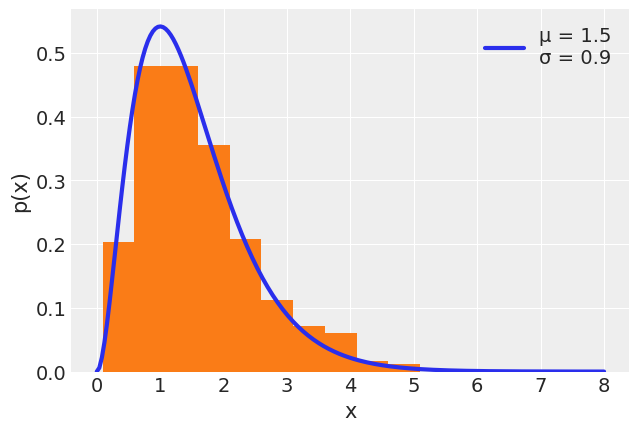

In [16]:
distri = stats.gamma(a=3, scale=0.5)  # alfa 3, theta 0.5
x = np.linspace(0, 8, 200)
x_rvs = distri.rvs(500)  # muestrear 500 valores de la distribuci√≥n
x_pdf = distri.pdf(x)  # la pdf evaluada para todos los x
media, varianza = distri.stats(moments='mv')
plt.plot (x, x_pdf, lw=3,
          label=f'Œº = {media:3.1f}\nœÉ = {varianza**0.5:3.1f}')
plt.hist(x_rvs, density=True)

plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

### Relaci√≥n entre probabilidad conjunta, condicional y marginal

Al definir probabilidad condicional usamos la _expresi√≥n 0.5_. Ahora que ya estamos familiarizados con las distribuciones de probabilidad podemos representar gr√°ficamente los tres t√©rminos en la _expresi√≥n 0.5_, tal como se muestra en la siguiente figura.

<img src="img/probabilidades.png" width=500>

* Probabilidad conjunta $p(A, B)$
* Probabilidad marginal $p(A)$ o $p(B)$ 
* Probabilidad condicional $p(A \mid B)$

Podemos re-escribir la _expresi√≥n 0.5_ de la siguiente manera:

$$
p(A, B) = p(A \mid B) {p(B)}  \tag {0.18}
$$

Es decir si tomo una probabilidad condicional y la _eval√∫o_ para todos los valores de la cantidad _condicionante_ ($B$ en este caso), obtengo la distribuci√≥n conjunta. Esto se puede ver graficamente si pensamos que $p(A \mid B)$ es una _rebanada_ de p(A, B); rebanada que tomamos _a la altura_ de $B$. Si tomamos todas las rebanadas entonces obtendremos $p(A, B)$.

Para obtener las probabilidades marginales, que se encuentran en los _margenes_ üòâ, podemos calcular algo similar:

$$
p(A) = \sum_B p(A, B) = \sum_B p(A \mid B) {p(B)} \tag {0.19}
$$ 

Cambiando la sumatoria por una integral para distribuciones continuas.

### Distribuci√≥n acumulada

La $pdf$ (o la $pmf$) son formas comunes de representar y trabajar con variables aleatorias, pero no son las √∫nicas formas posibles. Existen otras representaciones equivalentes. Por ejemplo la funci√≥n de distribuci√≥n acumulada ($cdf$ en ingl√©s). Al integrar una $pdf$ se obtiene la correspondiente $cdf$, y al derivar la $cdf$ se obtiene la $pdf$.


La integral de la $pdf$ es llamada funci√≥n de distribuci√≥n acumulada ($cdf$):

$$
cdf(x) = \int_{-\infty}^{x} pdf(x) d(x) \tag {0.20}
$$

En algunas situaciones se prefiere hablar de la funci√≥n de supervivencia:

$$
S(x) = 1 - cdf  \tag {0.21}
$$


A continuaci√≥n un ejemplo de la $pdf$ y $cdf$ para 4 distribuciones de la familia Gaussiana.

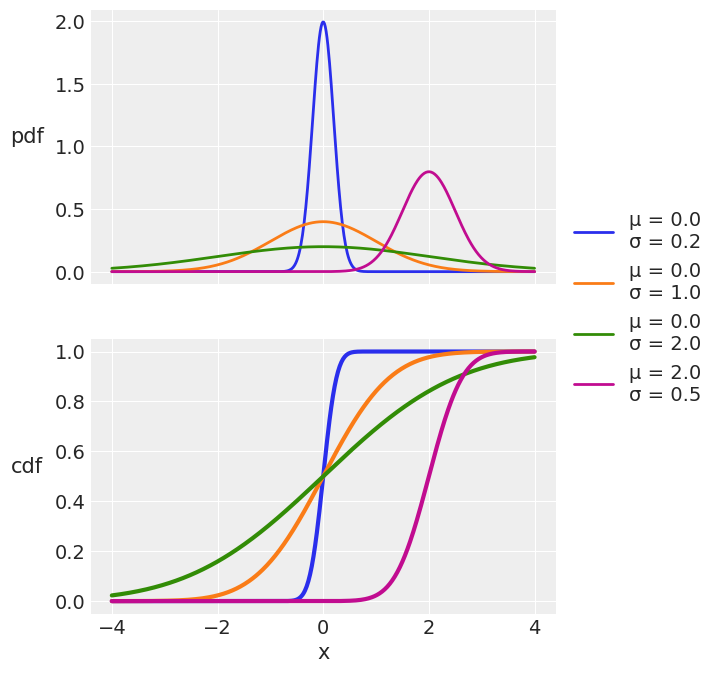

In [17]:
_, ax = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
x_valores = np.linspace(-4, 4, 500)
valores = [(0., .2), (0., 1.), (0., 2.), (2., .5)]
color = ['C0', 'C1', 'C2', 'C3']
for val, c in zip(valores, color):
    pdf = stats.norm(*val).pdf(x_valores)
    cdf = stats.norm(*val).cdf(x_valores)
    ax[0].plot(x_valores, pdf, lw=2, color=c,
               label=f'Œº = {val[0]}\nœÉ = {val[1]}')
    ax[1].plot(x_valores, cdf, lw=3, color=c)
ax[0].set_ylabel('pdf', rotation=0, labelpad=20)
ax[0].legend(bbox_to_anchor=(1.35, 0.33))
ax[1].set_ylabel('cdf', rotation=0, labelpad=20)
ax[1].set_xlabel('x');


La siguiente figura tomada del libro [Think Stats](http://greenteapress.com/thinkstats2/html/index.html) resume las relaciones entre la $cdf$, $pdf$ y $pmf$.

<img src='img/cmf_pdf_pmf.png' width=600 >

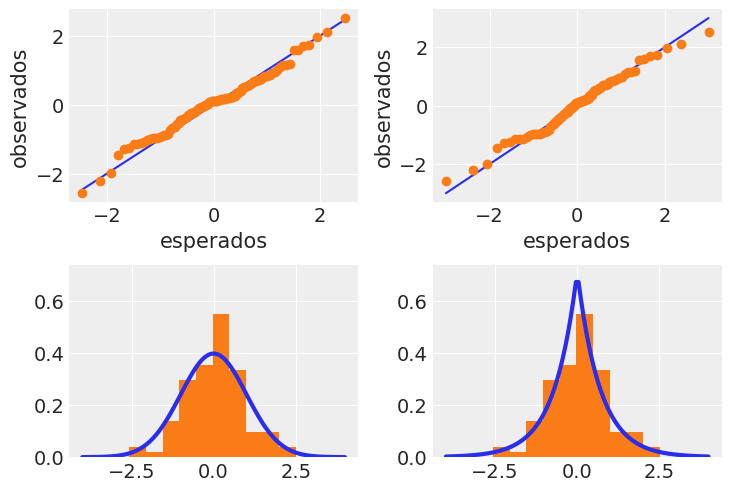

In [18]:
muestra = np.random.normal(0, 1, 100)
dist = stats.norm(0, 1), stats.laplace(scale=0.7)
x = np.linspace(-4, 4, 100)
dist_pdf = dist[0].pdf(x), dist[1].pdf(x)


_, ax = plt.subplots(2, 2, constrained_layout=True)
for i in range(2):
    osm, osr = stats.probplot(muestra, fit=False, dist=dist[i])
    ax[0,i].plot(osm, osm)
    ax[0,i].plot(osm, osr, 'o')
    ax[0,i].set_xlabel('esperados')
    ax[0,i].set_ylabel('observados')
    ax[1, i].plot(x, dist_pdf[i], lw=3)
    ax[1, i].hist(muestra, density=True)
    ax[1, i].set_ylim(0, np.max(dist_pdf) * 1.1)

## L√≠mites 

Los dos teoremas m√°s conocidos y usados en probabilidad son la ley de los grande n√∫meros y el teorema del l√≠mite central. Ambos nos dicen que le sucede a la media muestral a medida que el tama√±o de la muestra aumenta.

### La ley de los grandes n√∫meros

El valor promedio calculado para una muestra converge al valor esperado (media) de dicha distribuci√≥n. Esto no es cierto para algunas distribuciones como la distribuci√≥n de Cauchy (la cual no tiene media ni varianza finita).

La ley de los grandes n√∫meros se suele malinterpretar y dar lugar a la paradoja del apostador. Un ejemplo de esta paradoja es creer que conviene apostar en la loter√≠a/quiniela a un n√∫mero _atrasado_, es decir un n√∫mero que hace tiempo que no sale. El razonamiento, err√≥neo, es que como todos los n√∫meros tienen la misma probabilidad a largo plazo si un n√∫mero viene _atrasado_ entonces hay alguna especie de fuerza que aumenta la probabilidad de ese n√∫mero en los pr√≥ximo sorteos para as√≠ re-establecer la equiprobabilidad de los n√∫meros.

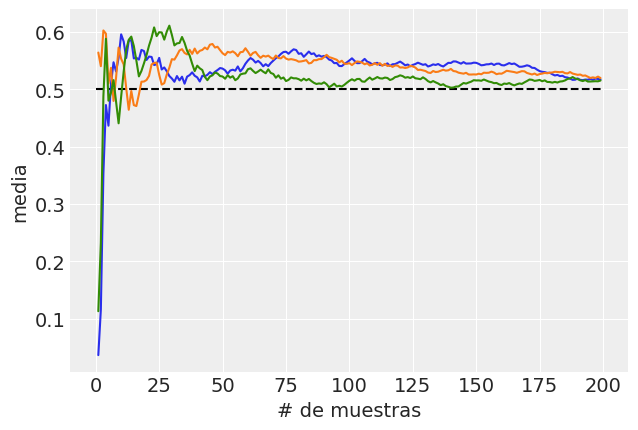

In [19]:
tama√±o_muestra = 200
muestras = range(1, tama√±o_muestra)
dist = stats.uniform(0, 1)
media_verdadera = dist.stats(moments='m')

for _ in range(3):
    muestra = dist.rvs(tama√±o_muestra)
    media_estimada = [muestra[:i].mean() for i in muestras]
    plt.plot(muestras, media_estimada, lw=1.5)

plt.hlines(media_verdadera, 0, tama√±o_muestra, linestyle='--', color='k')
plt.ylabel("media", fontsize=14)
plt.xlabel("# de muestras", fontsize=14);

### El teorema central del l√≠mite

El teorema central del l√≠mite (tambi√©n llamado teorema del l√≠mite central) establece que si tomamos $n$ valores (de forma independiente) de una distribuci√≥n arbitraria la media $\bar X$ de esos valores se _distribuir√° aproximadamente como_ una Gaussiana a medida que ${n \rightarrow \infty}$:

$$
\bar X_n \dot\sim \mathcal{N} \left(\mu,  \frac{\sigma^2}{n}\right) \tag {0.22}
$$

Donde $\mu$ y $\sigma^2$ son la media y varianza poblacionales.

Para que el teorema del l√≠mite central se cumpla se deben cumplir los siguientes supuestos:

1. Las variables se muestrean de forma independiente
1. Las variables provienen de la misma distribuci√≥n
1. La media y la desviaci√≥n est√°ndar de la distribuci√≥n tiene que ser finitas

Los criterios 1 y 2 se pueden relajar _bastante_ y a√∫n as√≠ obtendremos aproximadamente una Gaussiana, pero del criterio 3 no hay forma de escapar. Para distribuciones como la distribuci√≥n de Cauchy, que no posen media ni varianza definida este teorema no se aplica. El promedio de $N$ valores provenientes de una distribuci√≥n Cauchy no siguen una Gaussiana sino una distribuci√≥n de Cauchy.

El teorema del l√≠mite central explica la prevalencia de la distribuci√≥n Gaussiana en la naturaleza. Muchos de los fen√≥menos que estudiamos se pueden explicar como fluctuaciones alrededor de una media, o ser el resultado de la suma de muchos factores diferentes. Adem√°s, las Gaussianas son muy comunes en probabilidad, estad√≠stica y _machine learning_ ya que que esta familia de distribuciones son m√°s simples de manipular matem√°ticamente que muchas otras distribuciones.

A continuaci√≥n vemos una simulaci√≥n que nos muestra el teorema del l√≠mite central en acci√≥n.

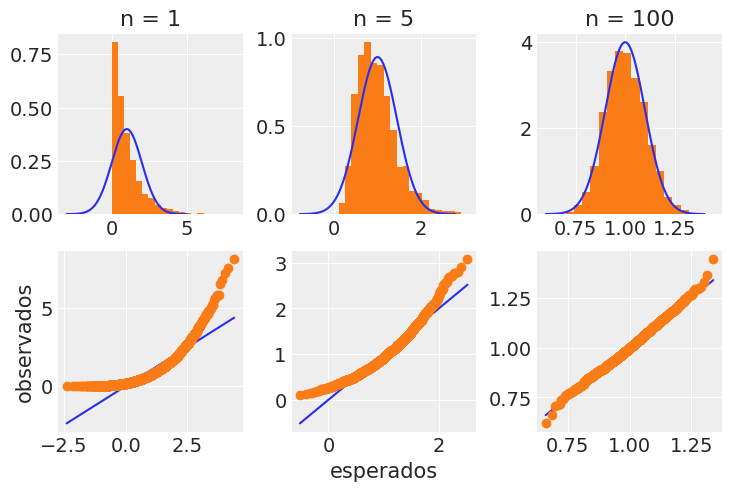

In [20]:
iters = 2000
distri = stats.expon(scale=1)
media, var = distri.stats(moments='mv')

_, ax = plt.subplots(2, 3, constrained_layout=True)

for i, n in enumerate([1, 5, 100]):
    sample = np.mean(distri.rvs((n, iters)), axis=0)

    sd = (var/n)**0.5 
    x = np.linspace(media - 4 * sd, media + 4 * sd, 200)
    ax[0, i].plot(x, stats.norm(media, sd).pdf(x))
    ax[0, i].hist(sample, density=True, bins=20)
    ax[0, i].set_title('n = {}'.format(n))
    osm, osr = stats.probplot(sample, dist=stats.norm(media, sd), fit=False)
    ax[1, i].plot(osm, osm)
    ax[1, i].plot(osm, osr, 'o')
ax[1, 0].set_ylabel('observados')
ax[1, 1].set_xlabel('esperados');

## Ejercicios

1. De las siguientes expresiones cual(es) se corresponde(n) con el enunciado "la probabilidad de lluvia dado que es 25 de Mayo de 1810"?
    * p(lluvia)
    * p(lluvia | mayo)
    * p(25 de Mayo de 1810 | lluvia)
    * p(lluvia | 25 de Mayo de 1810 )
    * p(lluvia, 25 de Mayo de 1810) / p(25 de Mayo de 1810)
    
2. Enuncie con palabras cada una de las expresiones del punto anterior. 

1. Seg√∫n la definici√≥n de probabilidad condicional
    * Cual es el valor de $P(A \mid A)$?
    * Cual es la probabilidad de $P(A, B)$?
    * Cual es la probabilidad de $P(A, B)$ en el caso especial que $A$ y $B$ sean independientes? 
    * Cuando se cumple que $P(A \mid B) = P(A)$?
    * Es posible que $P(A \mid B) > P(A)$, cuando?
    * Es posible que $P(A \mid B) < P(A)$, cuando?

 Los siguientes ejercicios se deben realizar usando Python (y NumPy, SciPy, Matplotlib)
1. Ilustrar que la distribuci√≥n de Poisson se aproxima a una binomial cuando para la binomial $n >> p$.

1. Para alguna de las distribuciones discretas presentadas en esta notebook verificar que la probabilidad total es 1.

1. Para alguna de las distribuciones continuas presentadas en esta notebook verificar que el √°rea bajo la curva es 1.

1. Obtener la cdf a partir de la pdf (usar el m√©todo pdf provisto por SciPy). La funci√≥n `np.cumsum` puede ser de utilidad.

1. Obtener la pdf a partir de la cdf (usar el m√©todo cdf provisto por SciPy). La funci√≥n `np.diff` puede ser de utilidad.

1. Repetir la simulaci√≥n para la ley de los grandes n√∫meros para al menos 3 distribuciones de probabilidad. Para cada distribuci√≥n probar m√°s de un conjunto de par√°metros.

1. Repetir la simulaci√≥n para el teorema central del l√≠mite para al menos 3 distribuciones de probabilidad. Para cada distribuci√≥n probar m√°s de un conjunto de par√°metros.

1. Mostrar en un gr√°fico que la media $\bar X$ converge a $\mu$ y la varianza converge a $\frac{\sigma^2}{n}$ a medida que aumenta el tama√±o de la muestra.